In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [4]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [5]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [14]:
train.groupby('churn')['churn'].count()

churn
no     3652
yes     598
Name: churn, dtype: int64

The dataset is imbalanced since only 14% out of 4250 customers left the telco

In [6]:
# Divide our dataset into 2 dataframes using "churn" for easy programming
train_churn_yes = train[train['churn']=='yes']
train_churn_yes = train_churn_yes.reset_index()

train_churn_no = train[train['churn']=='no']
train_churn_no = train_churn_no.reset_index()

In [7]:
train_churn_yes['churn'].value_counts()

yes    598
Name: churn, dtype: int64

In [8]:
train_churn_no['churn'].value_counts()

no    3652
Name: churn, dtype: int64

#### state

In [9]:
train.groupby('state')['state'].count()

state
AK     61
AL    101
AR     71
AZ     77
CA     39
CO     80
CT     88
DC     72
DE     80
FL     76
GA     64
HI     77
IA     62
ID    106
IL     79
IN     83
KS     87
KY     85
LA     69
MA     89
MD     86
ME     89
MI     87
MN    108
MO     80
MS     82
MT     80
NC     80
ND     67
NE     73
NH     78
NJ     96
NM     78
NV     83
NY     96
OH     95
OK     78
OR     99
PA     67
RI     87
SC     72
SD     75
TN     79
TX     98
UT     97
VA    100
VT     86
WA     80
WI     94
WV    139
WY     95
Name: state, dtype: int64

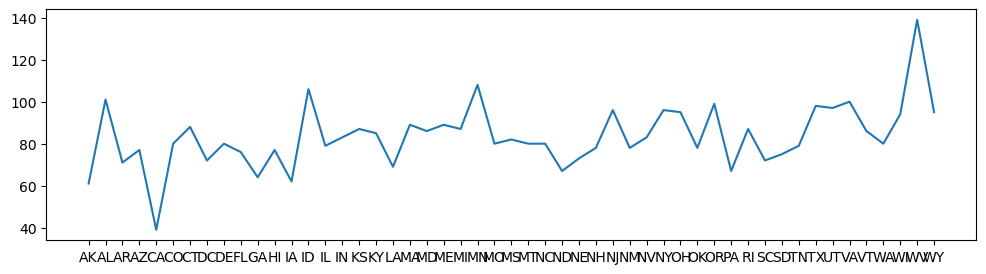

In [10]:
plt.figure(figsize=(12,3))
plt.plot(train.groupby('state')['state'].count())
plt.show()

CA has lowest number of subscribers i.e. 38 while WV has highest number of subscribers i.e. 139

In [11]:
# A function to print stats

def print_stats(dataset, feature_name, target_variable):
    print(dataset.groupby(target_variable)[feature_name].describe())
    

In [17]:
# A function to plot PDF, CDF, Box plot and Violin plot

def plot_pdf_cdf_box_violin(dataset, dataset_a, dataset_b, feature_name, target_variable):
    counts_a, bin_edges_a = np.histogram(dataset_a[feature_name], bins=10, density=True)
    pdf_a = counts_a / sum(counts_a)
    cdf_a = np.cumsum(pdf_a)
    
    counts_b, bin_edges_b = np.histogram(dataset_b[feature_name], bins=10, density=True)
    pdf_b = counts_b / sum(counts_b)
    cdf_b = np.cumsum(pdf_b)
    
    f = plt.figure(figsize=(16,10))
    
    ax_1a = f.add_subplot(221) # PDF for dataset_a
    ax_1b = f.add_subplot(221, sharex=ax_1a, sharey=ax_1a) # PDF for dataset_b
    
    ax_2a = f.add_subplot(222) # CDF for datset_a
    ax_2b = f.add_subplot(222, sharex=ax_2a, sharey=ax_2a) # CDF for dataset_b
    
    ax_3 = f.add_subplot(223) # Box plot for both datasets
    ax_4 = f.add_subplot(224) # Violin plot for both datasets
    
    # Plot PDFs
    sns.lineplot(ax=ax_1a, x=bin_edges_a[1:], y=pdf_a, label='Churned')
    sns.lineplot(ax=ax_1b, x=bin_edges_b[1:], y=pdf_b, label='Not churned')
    ax_1a.set(xlabel=feature_name, ylabel='PDF')
    ax_1a.set_title('PDF for '+feature_name)

    # Plot CDFs
    sns.lineplot(ax=ax_2a, x=bin_edges_a[1:], y=cdf_a, label='Churned')
    sns.lineplot(ax=ax_2b, x=bin_edges_b[1:], y=cdf_b, label='Not churned')
    ax_2a.set(xlabel=feature_name, ylabel='CDF')
    ax_2a.set_title('CDF for '+feature_name)
    
    #Plot Box plot
    sns.boxplot(ax=ax_3, data=dataset, x=target_variable, y=feature_name)
    ax_3.set_title('Box plot for '+feature_name)
    
    # Plot Violin plot
    sns.violinplot(ax=ax_4, data=dataset, x=target_variable, y=feature_name)
    ax_4.set_title('Violin plot for '+feature_name)
    
    plt.show()

#### account_length

In [13]:
train.groupby('churn')['account_length'].mean()

churn
no      99.924973
yes    102.137124
Name: account_length, dtype: float64

The average account_length for customers who left is 102 months while 100 months for those who did not leave

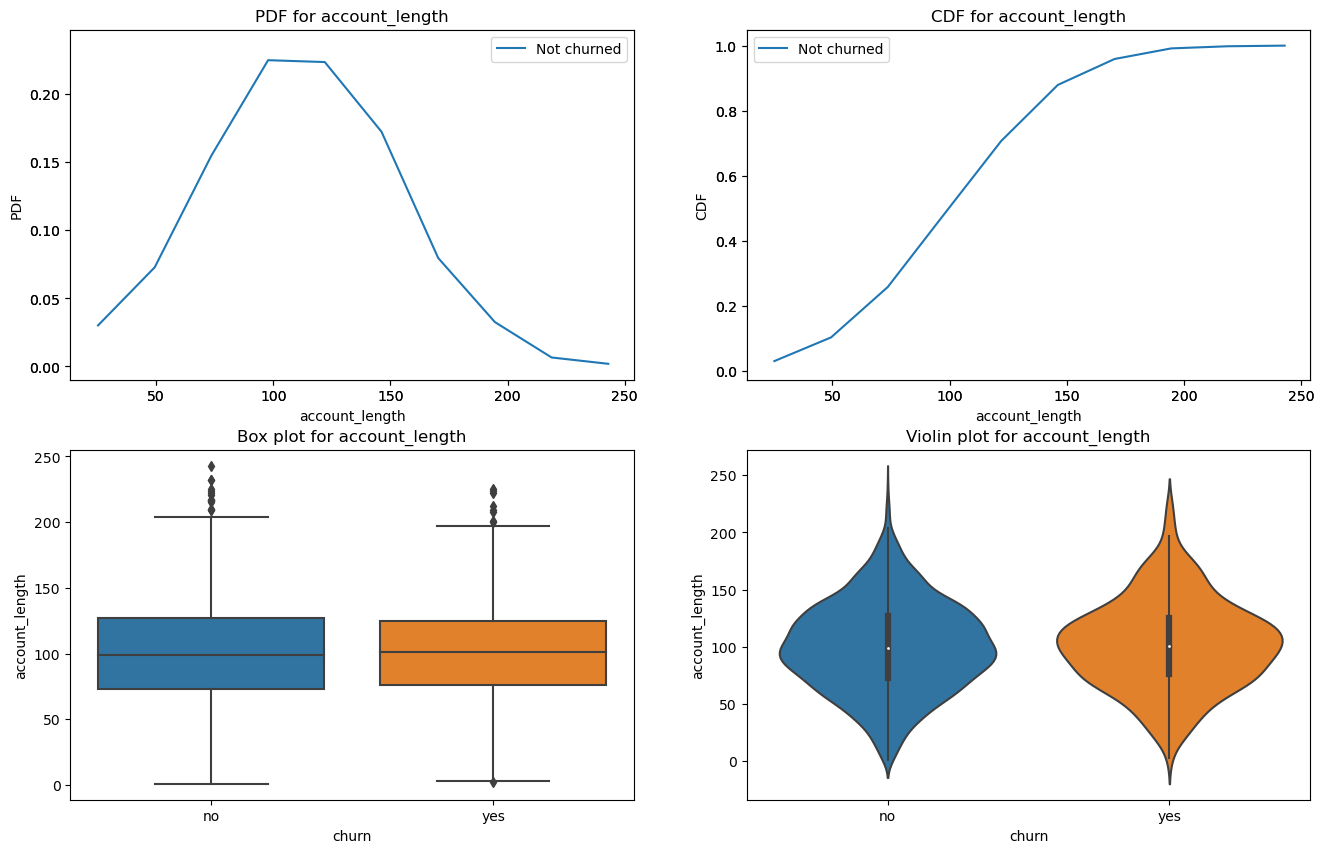

In [18]:
plot_pdf_cdf_box_violin(train, train_churn_yes, train_churn_no, 'account_length', 'churn')

#### number_vmail_messages

In [20]:
print_stats(train, 'number_vmail_messages', 'churn')

        count      mean        std  min  25%  50%   75%   max
churn                                                        
no     3652.0  8.177437  13.706304  0.0  0.0  0.0  20.0  52.0
yes     598.0  4.299331  11.124649  0.0  0.0  0.0   0.0  48.0


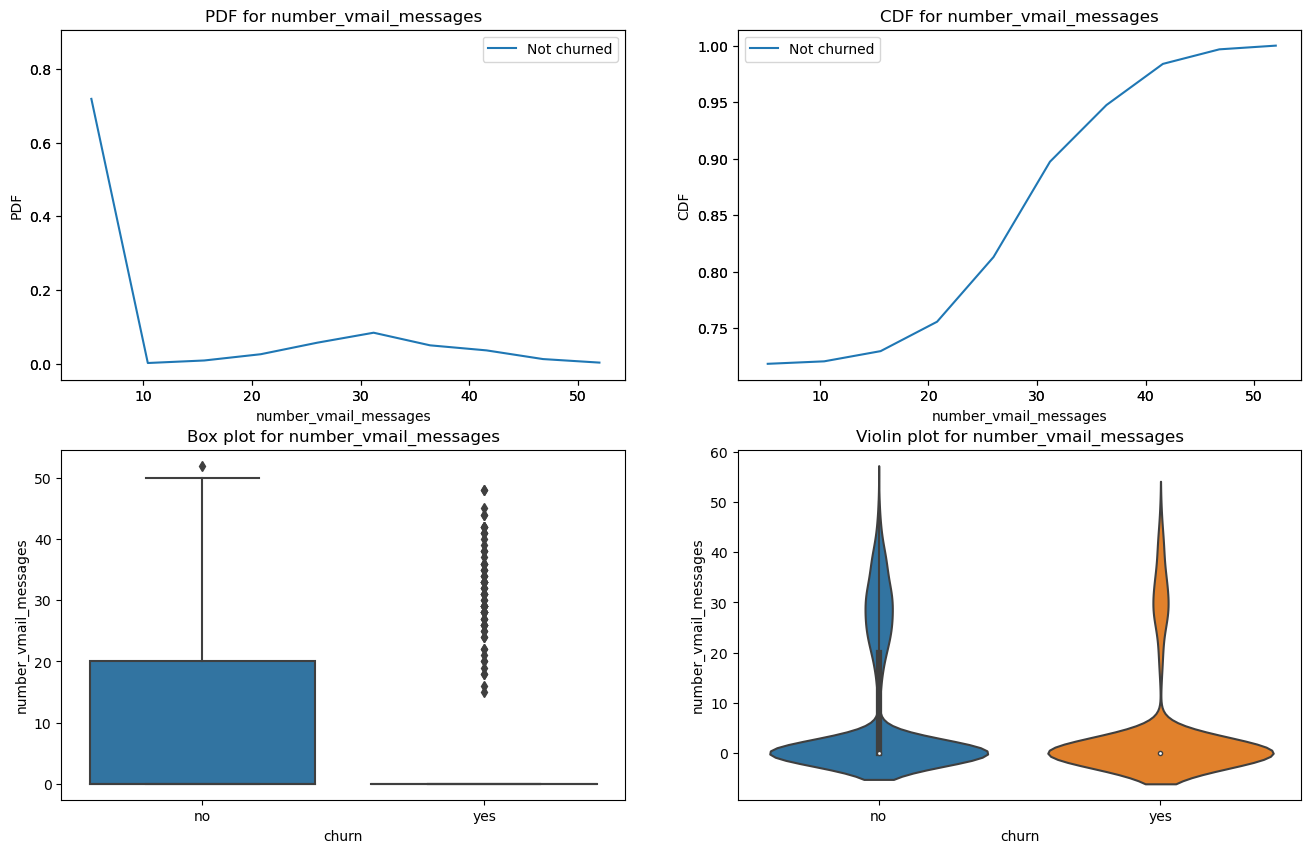

In [21]:
plot_pdf_cdf_box_violin(train, train_churn_yes, train_churn_no,'number_vmail_messages', 'churn')